In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

# Data import & clean 数据清洗

In [2]:
data = pd.read_csv('cleaned data.csv')

In [3]:
data

,rideable_type,duration,member_casual,time_class,date_class,back_or_not
0,electric_bike,158,member,6,1,0
1,electric_bike,250,casual,5,0,0
2,electric_bike,88,casual,4,0,0
3,electric_bike,53,casual,8,0,0
4,electric_bike,115,member,5,1,0
...,...,...,...,...,...,...
132868,docked_bike,432,casual,5,1,1
132869,docked_bike,824,casual,6,1,1
132870,docked_bike,1036,casual,5,1,1
132871,docked_bike,273,casual,5,1,1


## Balance 数据组平衡

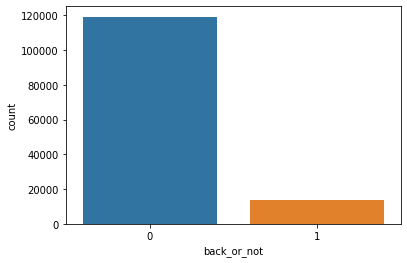

In [4]:
sns.countplot(data['back_or_not'])

In [3]:
le = preprocessing.LabelEncoder()
data['rideable_type'] = le.fit_transform(data['rideable_type'])
data['member_casual'] = le.fit_transform(data['member_casual'])

In [4]:
x = data.drop('back_or_not',axis=1)
y = pd.DataFrame(data['back_or_not'])

In [5]:
sm = SMOTE(random_state=32)

In [6]:
sm = SMOTE(random_state=32)

x_res, y_res = sm.fit_resample(x, y)



In [7]:
x_res, y_res = sm.fit_resample(x, y)

In [8]:
x_res['back_or_not']= y_res
data = x_res

In [10]:
data

,rideable_type,duration,member_casual,time_class,date_class,back_or_not
0,1,158,1,6,1,0
1,1,250,0,5,0,0
2,1,88,0,4,0,0
3,1,53,0,8,0,0
4,1,115,1,5,1,0
...,...,...,...,...,...,...
238211,1,17,0,5,0,1
238212,1,21,0,7,0,1
238213,0,57,0,5,0,1
238214,0,29,0,7,0,1


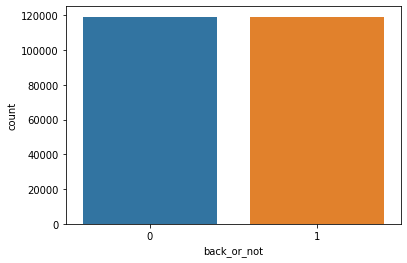

In [11]:
sns.countplot(data['back_or_not'])

## Further transformation 租借时长分类

意于清洗无效租借数据（通常是单车故障问题导致）

In [9]:
def newduration(L):
    for i in range(len(L)):
        if L[i] <= 30:
            L[i] = 0
        else:
            L[i] = 1

In [10]:
newduration(data['duration'].values)

In [14]:
data

,rideable_type,duration,member_casual,time_class,date_class,back_or_not
0,1,1,1,6,1,0
1,1,1,0,5,0,0
2,1,1,0,4,0,0
3,1,1,0,8,0,0
4,1,1,1,5,1,0
...,...,...,...,...,...,...
238211,1,0,0,5,0,1
238212,1,0,0,7,0,1
238213,0,1,0,5,0,1
238214,0,0,0,7,0,1


## Visualization 可视化

In [15]:
data_no = []
data_yes = []

for i in range(len(data)):
    if data['back_or_not'][i] == 0:
        data_no.append(data.iloc[i,:])
    else:
        data_yes.append(data.iloc[i,:])

df_no = pd.DataFrame(data_no)
df_yes = pd.DataFrame(data_yes)

Text(0.5, 1.0, 'rideable_type')

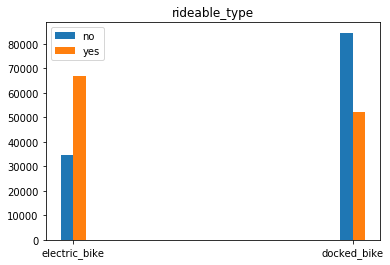

In [16]:
plt.hist([df_no.iloc[:,0],df_yes.iloc[:,0]])
plt.xticks([0.05,0.95],['electric_bike','docked_bike'])
plt.legend(['no','yes'])
plt.title(data.columns[0])

Text(0.5, 1.0, 'duration')

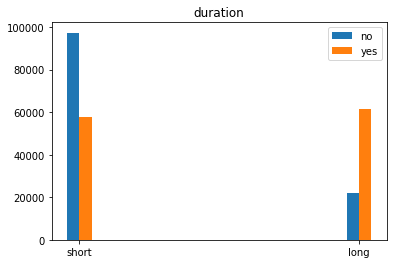

In [17]:
plt.hist([df_no.iloc[:,1],df_yes.iloc[:,1]])
plt.xticks([0.05,0.95],['short','long'])
plt.legend(['no','yes'])
plt.title(data.columns[1])

Text(0.5, 1.0, 'member_casual')

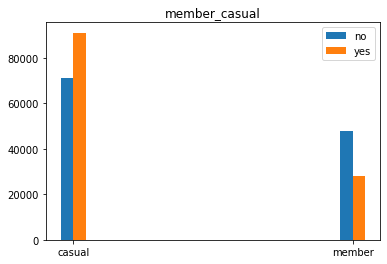

In [18]:
plt.hist([df_no.iloc[:,2],df_yes.iloc[:,2]])
plt.xticks([0.05,0.95],['casual','member'])
plt.legend(['no','yes'])
plt.title(data.columns[2])

Text(0.5, 1.0, 'time_class')

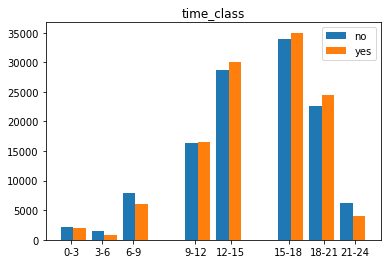

In [19]:
plt.hist([df_no.iloc[:,3],df_yes.iloc[:,3]])
plt.xticks([1.3, 2., 2.7, 4.1, 4.9, 6.2, 7., 7.7],['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24'])
plt.legend(['no','yes'])
plt.title(data.columns[3])

Text(0.5, 1.0, 'date_class')

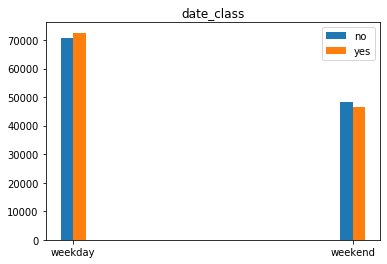

In [20]:
plt.hist([df_no.iloc[:,4],df_yes.iloc[:,4]])
plt.xticks([0.05,0.95],['weekday','weekend'])
plt.legend(['no','yes'])
plt.title(data.columns[4])

# Models 模型对比

## Naive bayes

In [11]:
datapoints = data.drop(['back_or_not'],axis=1)
labels = data['back_or_not']

In [22]:
from sklearn.naive_bayes import BernoulliNB
naivebayes = BernoulliNB()

In [12]:
datapoints = pd.get_dummies(datapoints, columns=['time_class'])

In [25]:
datapoints

,rideable_type,duration,member_casual,date_class,time_class_1,time_class_2,time_class_3,time_class_4,time_class_5,time_class_6,time_class_7,time_class_8
0,1,1,1,1,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238211,1,0,0,0,0,0,0,0,1,0,0,0
238212,1,0,0,0,0,0,0,0,0,0,1,0
238213,0,1,0,0,0,0,0,0,1,0,0,0
238214,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
data_train, data_test, labels_train, labels_test = train_test_split(datapoints, labels, test_size=0.2, random_state=32)

In [27]:
naivebayes.fit(data_train, labels_train)
predictions_NB = naivebayes.predict(data_test)

acc_test = accuracy_score(labels_test, predictions_NB)
print("Naive Bayes classifiers scored:: ", acc_test)

Naive Bayes classifiers scored::  0.6909369490387037


In [28]:
%%time
naivebayes.fit(data_train, labels_train)

CPU times: user 78.5 ms, sys: 13.1 ms, total: 91.6 ms
Wall time: 96.2 ms


BernoulliNB()

In [29]:
print(metrics.classification_report(labels_test, predictions_NB))
print(metrics.confusion_matrix(labels_test,predictions_NB))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70     23924
           1       0.70      0.66      0.68     23720

    accuracy                           0.69     47644
   macro avg       0.69      0.69      0.69     47644
weighted avg       0.69      0.69      0.69     47644

[[17258  6666]
 [ 8059 15661]]


In [30]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[17258  6666]
 [ 8059 15661]]


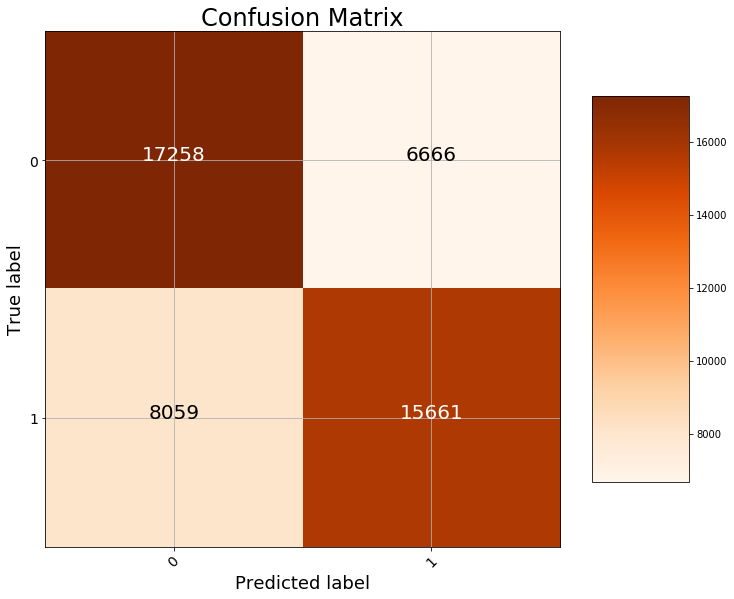

In [31]:
cm = confusion_matrix(labels_test, predictions_NB)
plot_confusion_matrix(cm, classes = ['0', '1'],
                      title = 'Confusion Matrix')

## Random forest

In [32]:
decisiontree = DecisionTreeClassifier()
randomforest = BaggingClassifier(decisiontree, n_estimators=50, max_samples=1.0, random_state=12)

from sklearn.model_selection import cross_val_score

scores_forest = cross_val_score(randomforest, datapoints, labels, cv=10)

print("Random forest of decision tree classifiers scored: ", scores_forest.mean())

Random forest of decision tree classifiers scored:  0.694412039228676


# Models 模型优化

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.ensemble.forest import RandomForestRegressor

randomforest = RandomForestRegressor(n_estimators=50, max_features=12,random_state=12)

from sklearn.model_selection import cross_val_score

scores_forest = cross_val_score(randomforest, datapoints, labels, cv=10)

print("Random forest of decision tree classifiers scored: ", scores_forest.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


Random forest of decision tree classifiers scored:  0.02421741396596159


In [ ]:
from sklearn.model_selection import GridSearchCV
model = BaggingClassifier(decisiontree, max_samples=1.0, random_state=12)
parameters = {
              'n_estimators': [5,10,20,30,40,50,60,70,80,90,100,200,500],
             }
gridsearch = GridSearchCV(randomforest, param_grid=parameters, cv=10)
gridsearch.fit(datapoints, labels)

In [ ]:
gridsearch.best_params_

In [ ]:
pd.DataFrame(gridsearch.cv_results_)

# 代码封装

In [ ]:
import pickle

s = pickle.dumps(randomforest)
f = open('prediction.model', "wb+")
f.write(s)
f.close()
print ("Done\n")

In [ ]:
def Lyft_bike_return_prediction(file_name):

    import pandas as pd
    from sklearn import preprocessing

    data = pd.read_csv(file_name)
    le = preprocessing.LabelEncoder()
    data['rideable_type'] = le.fit_transform(data['rideable_type'])
    data['member_casual'] = le.fit_transform(data['member_casual'])
    x = data.drop('back_or_not',axis=1)
    
    def newduration(L):
        for i in range(len(L)):
            if L[i] <= 30:
                L[i] = 0
            else:
                L[i] = 1
    
    newduration(data['duration'].values)
    datapoints = data.drop(['back_or_not'],axis=1)
    datapoints = pd.get_dummies(datapoints, columns=['time_class'])
    

    import pickle

    f = open('prediction.model','rb')
    s = f.read()
    randomforest = pickle.loads(s)
    
    prediction_result = randomforest.predict(datapoints)
    prob_prediction = randomforest.predict_proba(datapoints)
    mylist = []
    for i in range(len(datapoints)):
        if prediction_result[i] == 1:
            mylist.append([i,prob_prediction[i][1]])
        else:
            continue
    mylist = pd.DataFrame(mylist,columns = ['data position','return probability'])
    
    return mylist